In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = 'C:/Users/kondr/Downloads/claims_q12023.csv'

In [3]:
# Załadowanie danych
data = pd.read_csv(path,sep = ';')

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
# Zestawienie braków danych w poszczególnych kolumnach
NA_sum = pd.DataFrame(data.isna().sum(),columns=['NA_sum'])
NA_percent = pd.DataFrame(data.isnull().mean() * 100,columns=['NA_percent'])
NA_summary = pd.concat([NA_sum,NA_percent],axis=1)
print(NA_summary)

                       NA_sum  NA_percent
cust_age                    0         0.0
policy_id                   0         0.0
coverage_start_date         0         0.0
cust_region                 0         0.0
sum_assured_group           0         0.0
ins_deductible              0         0.0
annual_prem                 0         0.0
zip_code                    0         0.0
insured_sex                 0         0.0
edu_lvl                     0         0.0
marital_status              0         0.0
claim_incurred_date         0         0.0
claim_type                  0         0.0
acc_type                  178        17.8
emg_services_notified       0         0.0
incident_city               0         0.0
incident_hour               0         0.0
num_vehicles_involved       0         0.0
property_damage             0         0.0
bodily_injuries             0         0.0
witnesses                   0         0.0
police_report_avlbl       343        34.3
total_claim_amount          0     

In [6]:
# Nowa zmienna - liczba dni od daty zawarcia ubezpieczenia do daty zajścia zdarzenia
data['coverage_start_date'] = pd.to_datetime(data['coverage_start_date'], format='%d.%m.%Y')
data['claim_incurred_date'] = pd.to_datetime(data['claim_incurred_date'], format='%d.%m.%Y')

data['days_from_coverage_start'] = (data['claim_incurred_date'] - data['coverage_start_date']).dt.days

# Nowa zmienna - wiek samochodu w latach w momencie zaistnienia zdarzenia
data['years_since_production'] = (data['claim_incurred_date'] - pd.to_datetime(data['production_year'], format='%Y')).dt.days // 365

In [7]:
data.head()

,cust_age,policy_id,coverage_start_date,cust_region,sum_assured_group,ins_deductible,annual_prem,zip_code,insured_sex,edu_lvl,marital_status,claim_incurred_date,claim_type,acc_type,emg_services_notified,incident_city,incident_hour,num_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_avlbl,total_claim_amount,injury_claim,property_claim,vehicle_claim,car_brand,car_model,production_year,days_from_coverage_start,years_since_production
0,44,225016,2007-09-08,north,mid,2000,1007.48,342178,F,college,other,2023-02-17,single vehicle collision,front collision,Fire,Riverwood,19,1,NO,0,2,YES,74140,13480,13480,47180,BMW,X5,2022,5641,1
1,56,316183,2016-02-02,north,mid,500,1080.60,506682,F,phd,unmarried,2023-02-28,multi-vehicle collision,front collision,Fire,Columbus,12,3,?,2,3,NaN,56430,0,6270,50160,Honda,CRV,2021,2583,2
2,28,174430,2020-02-04,east,mid,2000,1078.03,330854,M,high school,married,2023-02-26,single vehicle collision,rear collision,Ambulance,Riverwood,1,1,?,0,1,YES,53600,6700,6700,40200,Volkswagen,Jetta,2014,1118,9
3,53,67527,2013-01-27,north,low,1000,1026.55,502272,F,college,other,2023-01-26,single vehicle collision,front collision,Ambulance,Springfield,12,1,?,0,0,NO,80960,14720,7360,58880,Accura,MDX,2007,3651,16
4,47,259758,2015-04-08,east,mid,2000,1484.15,515656,F,associate,other,2023-01-14,multi-vehicle collision,rear collision,Other,Northbrook,1,3,NO,2,3,NaN,64100,12820,6410,44870,Dodge,RAM,2021,2838,2


In [8]:
# Podstawowe statystyki opisowe
data.describe()

,cust_age,policy_id,ins_deductible,annual_prem,zip_code,incident_hour,num_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,production_year,days_from_coverage_start,years_since_production
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,38.948000,329024.993000,1136.000000,1254.516150,401182.488000,11.644000,1.83900,0.988000,1.487000,52944.201000,7457.539000,7429.982000,38056.680000,2012.126000,5002.482000,10.874000
std,9.140287,154237.807437,611.864673,244.167395,71701.610941,6.951373,1.01888,0.818857,1.111335,26880.796007,4931.310627,4908.125387,19210.616078,6.015506,2708.026835,6.015506
min,19.000000,61764.000000,500.000000,431.440000,330072.000000,0.000000,1.00000,0.000000,0.000000,100.000000,0.000000,0.000000,70.000000,2002.000000,36.000000,1.000000
25%,32.000000,202870.000000,500.000000,1087.717500,348372.500000,6.000000,1.00000,0.000000,1.000000,41812.500000,4295.000000,4445.000000,30292.500000,2007.000000,2733.000000,6.000000
50%,38.000000,321160.000000,1000.000000,1255.310000,366413.500000,12.000000,1.00000,1.000000,1.000000,58055.000000,6775.000000,6750.000000,42100.000000,2012.000000,4953.000000,11.000000
75%,44.000000,456741.750000,2000.000000,1413.805000,503219.000000,17.000000,3.00000,2.000000,2.000000,70592.500000,11330.000000,10885.000000,50822.500000,2017.000000,7359.000000,16.000000
max,64.000000,600943.000000,2000.000000,2045.700000,520930.000000,23.000000,4.00000,2.000000,3.000000,151632.000000,24726.000000,28054.000000,106960.000000,2022.000000,9463.000000,21.000000


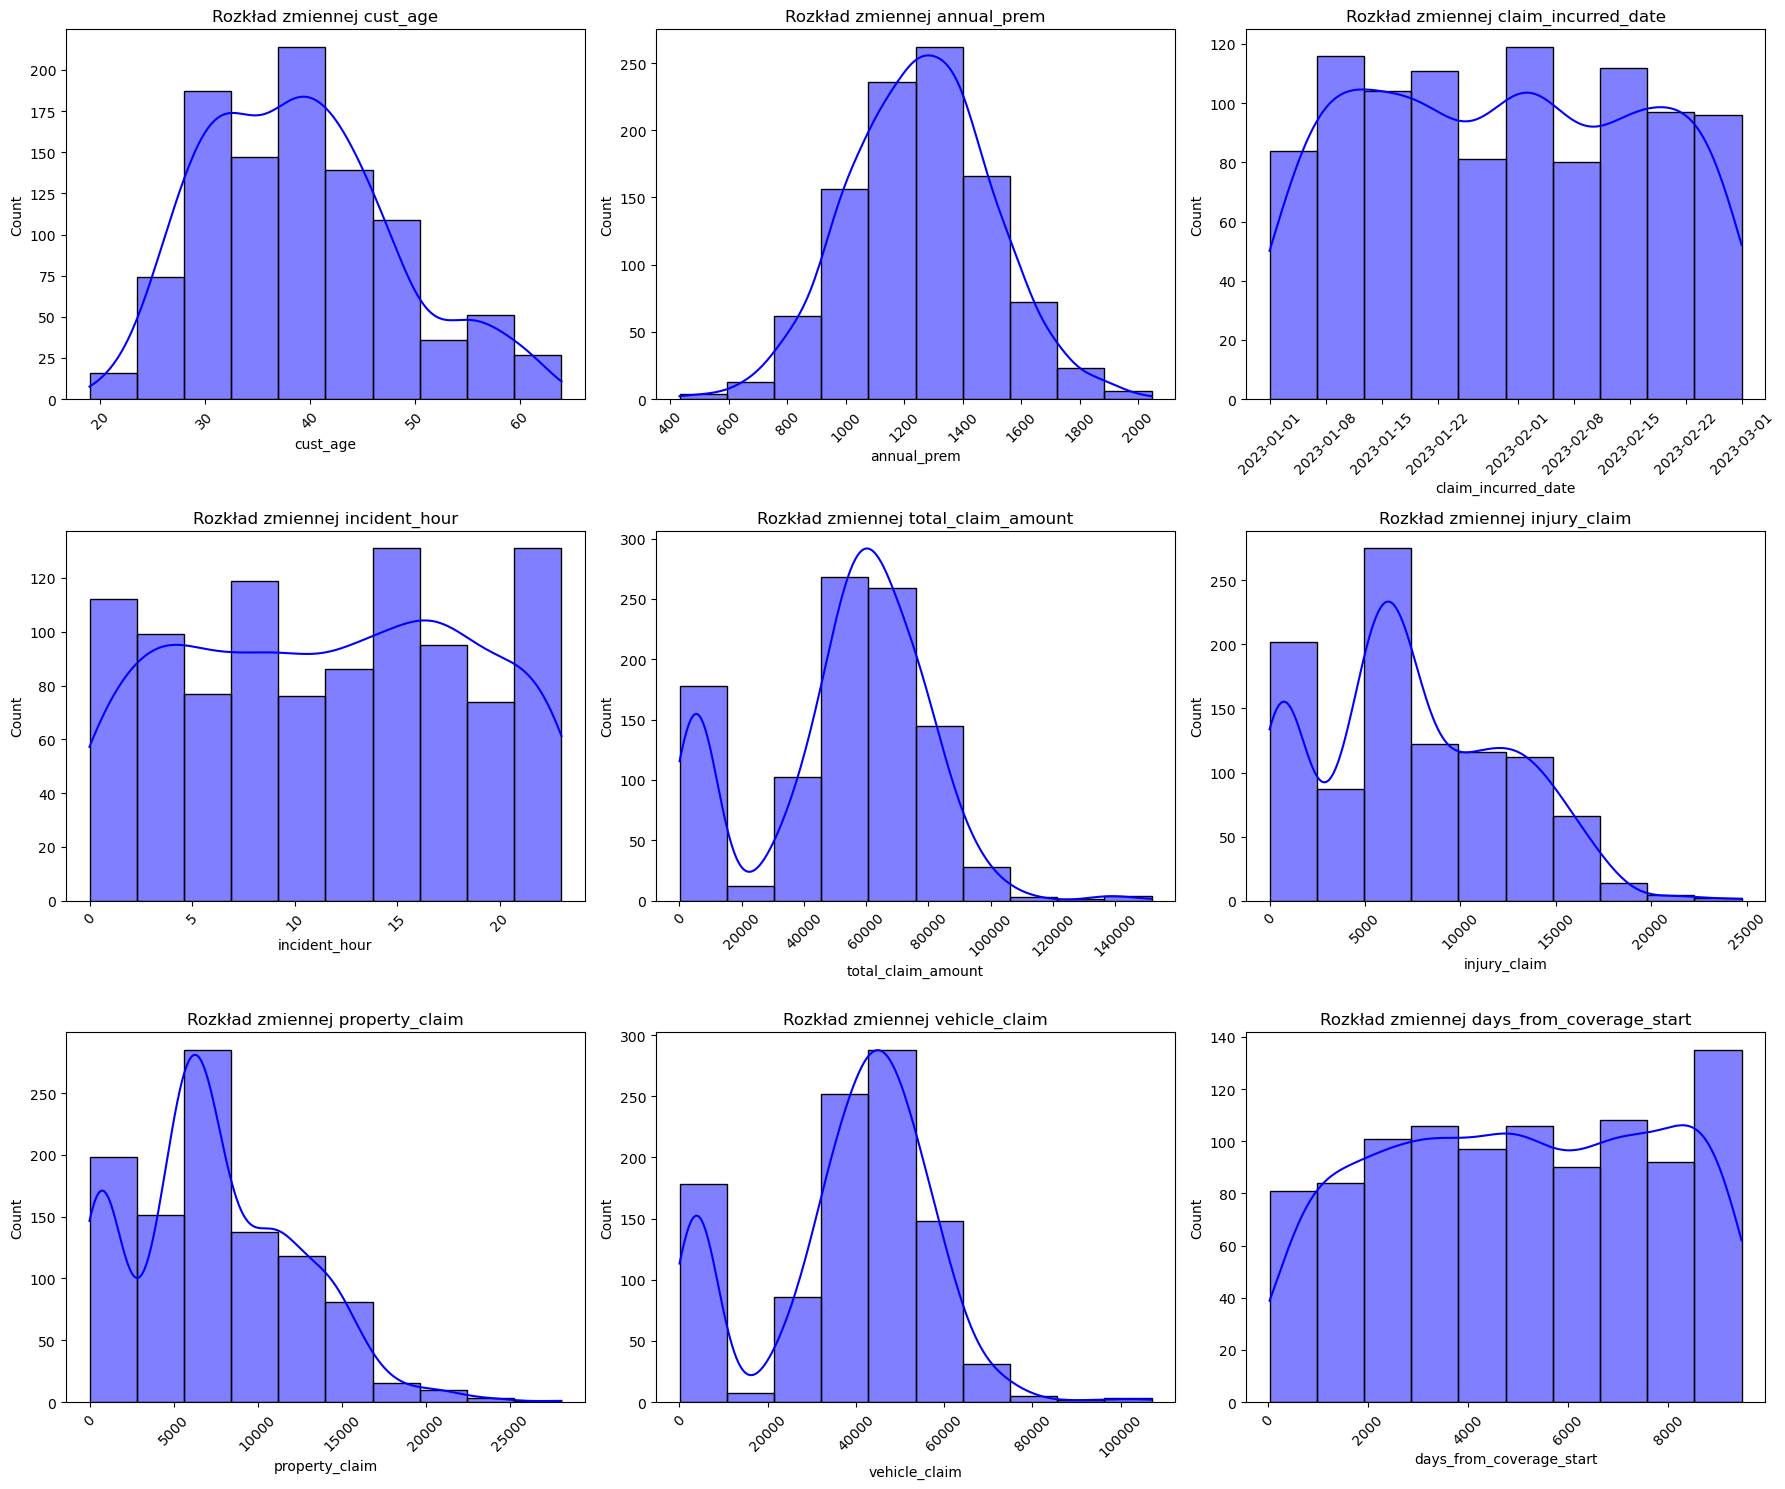

In [9]:
# Rozkłady zmiennych numerycznych
data_numeric = data[
    ['cust_age',
    'annual_prem',
    'claim_incurred_date',
    'incident_hour',
    'total_claim_amount',
    'injury_claim',
    'property_claim',
    'vehicle_claim',
    'days_from_coverage_start']
]

df_numeric = pd.DataFrame(data_numeric)

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 15))

for i, col in enumerate(df_numeric.columns):
    sns.histplot(df_numeric[col], bins=10, kde=True, color='blue', edgecolor='black', ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(f'Rozkład zmiennej {col}')
    axes[i//3, i%3].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

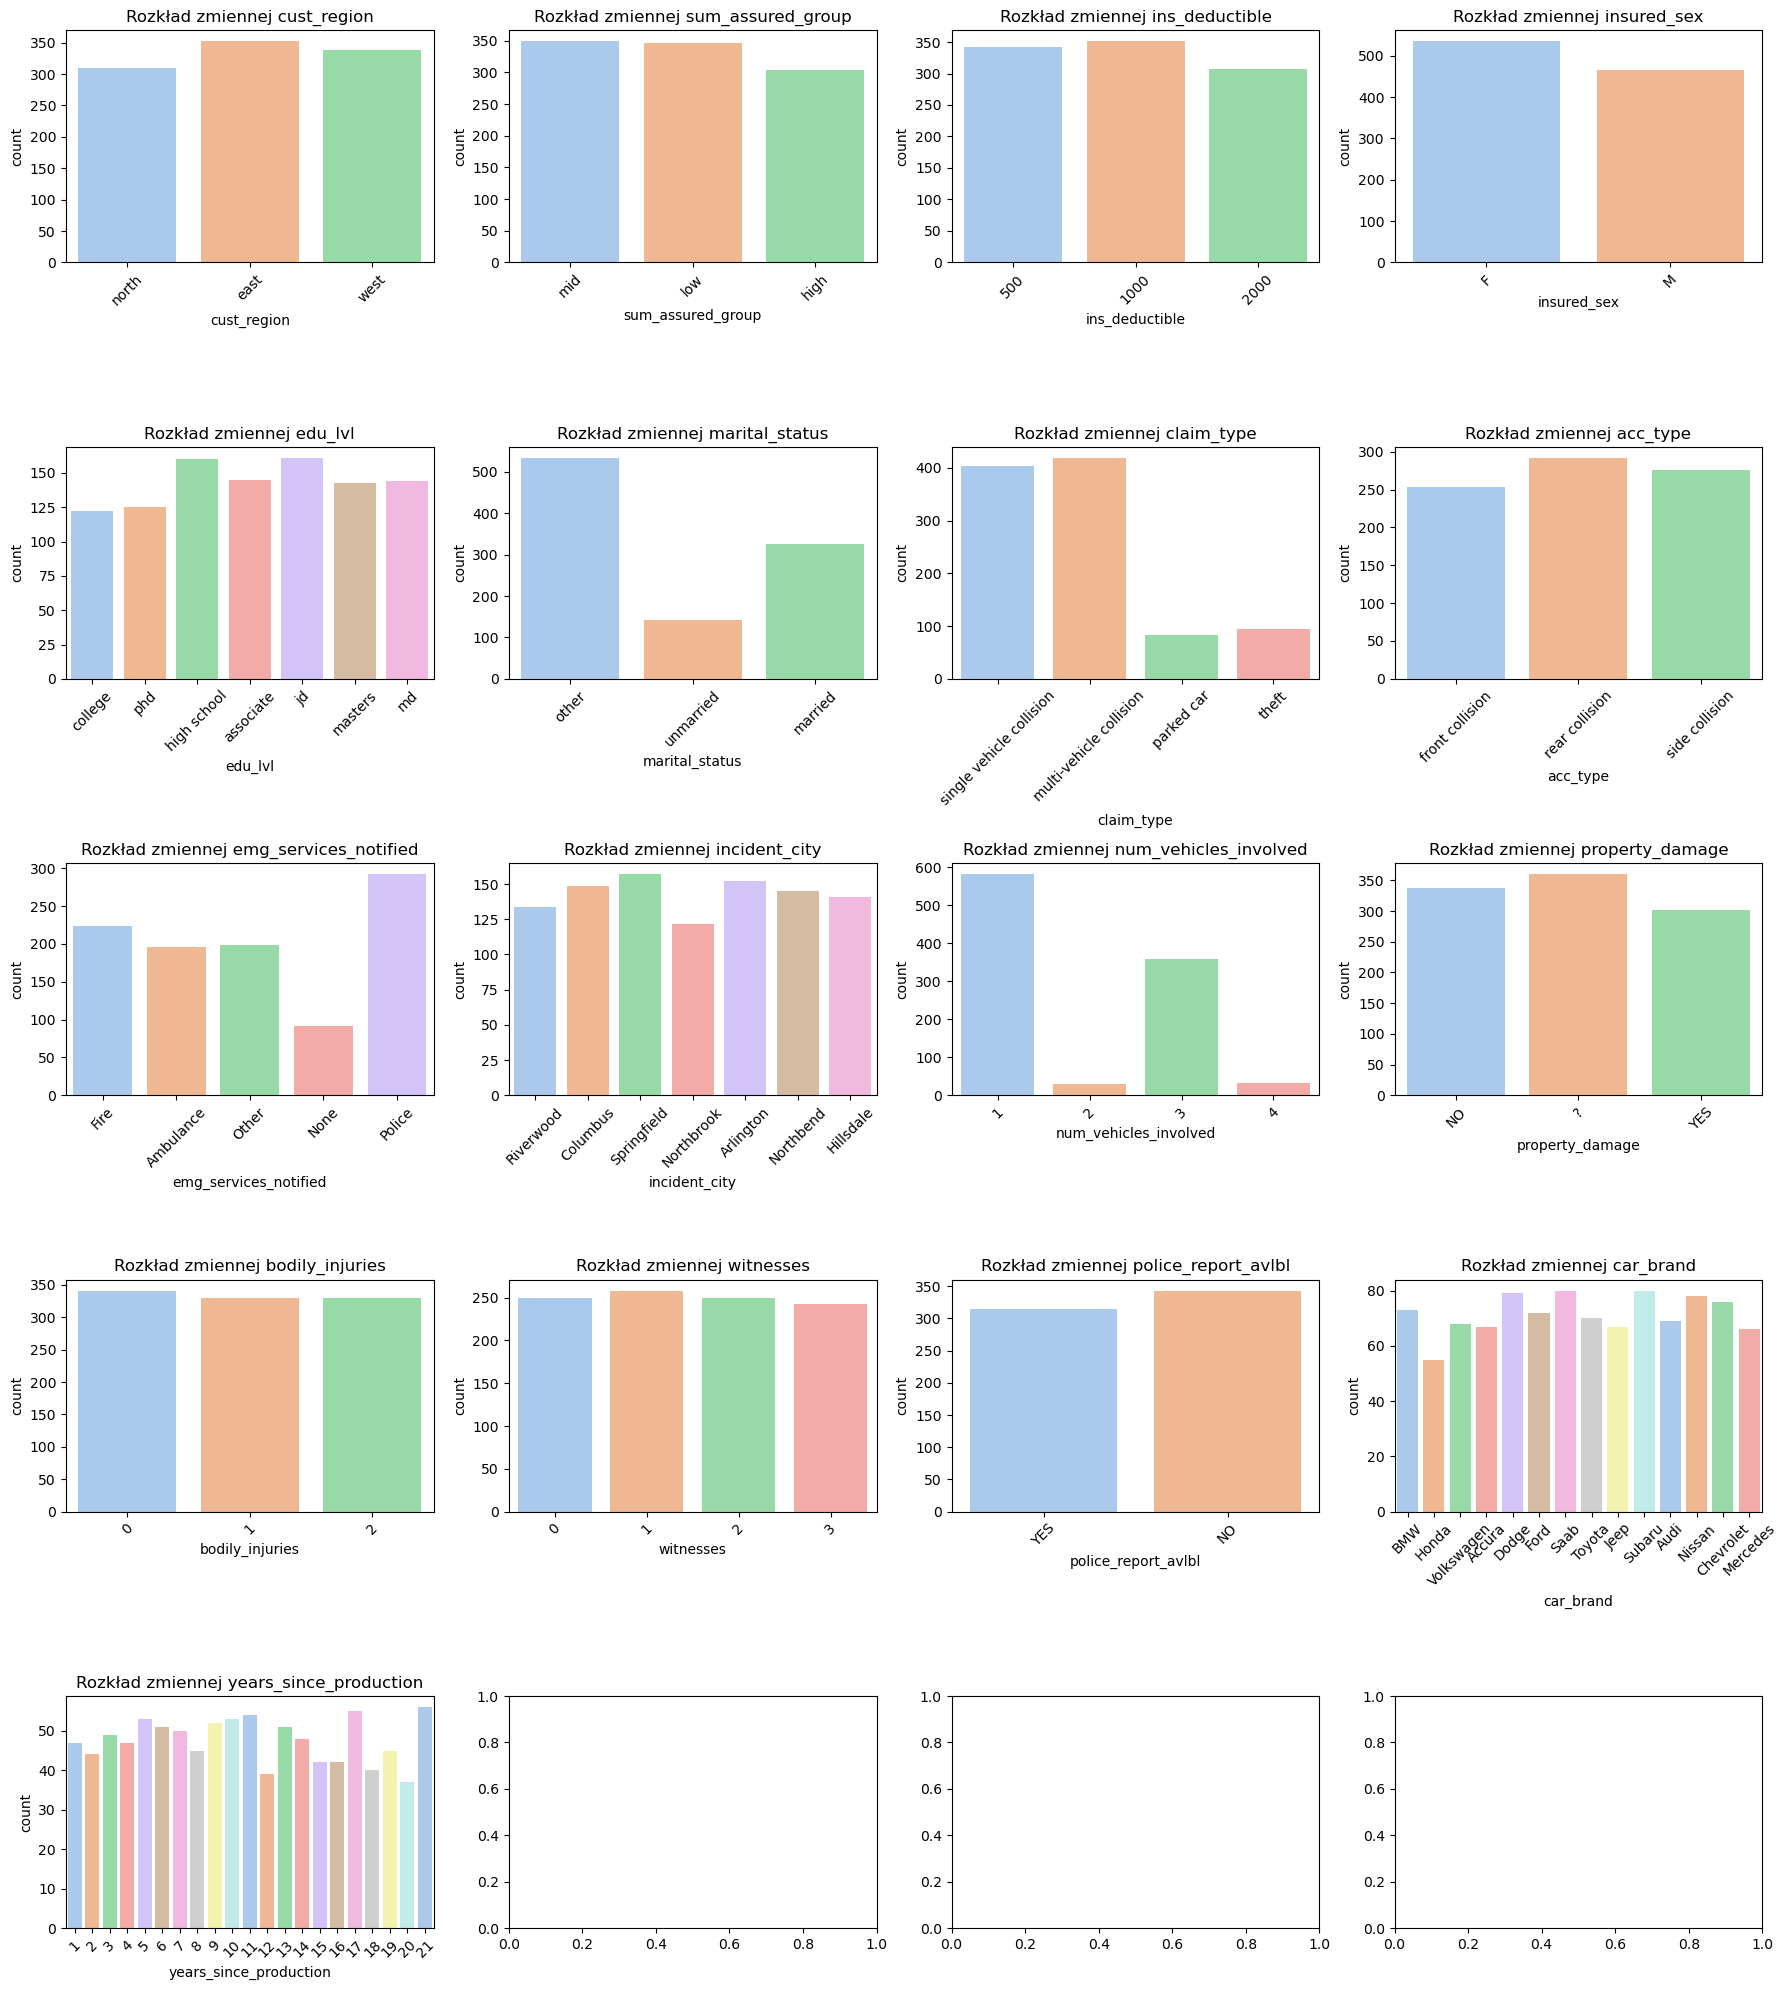

In [10]:
# Rozkłady zmiennych kategorycznych
data_categorical = data[
    ['cust_region',
    'sum_assured_group',
    'ins_deductible',
    'insured_sex',
    'edu_lvl',
    'marital_status',
    'claim_type',
    'acc_type',
    'emg_services_notified',
    'incident_city',
    'num_vehicles_involved',
    'property_damage',
    'bodily_injuries',
    'witnesses',
    'police_report_avlbl',
    'car_brand',
    'years_since_production']
]

df_categorical = pd.DataFrame(data_categorical)

# Tworzenie wykresów słupkowych dla zmiennych kategorycznych
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(18, 20))

for i, col in enumerate(df_categorical.columns):
    sns.countplot(x=df_categorical[col], palette='pastel', ax=axes[i//4, i%4])
    axes[i//4, i%4].set_title(f'Rozkład zmiennej {col}')
    axes[i//4, i%4].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [11]:
# Stworzenie nowych zmiennych 0-1 określających czy występuje brak danych w danej kolumnie
kolumny_z_brakami = ['acc_type', 'police_report_avlbl']

for kolumna in kolumny_z_brakami:
    data[f'{kolumna}_brak'] = data[kolumna].isnull().astype(int)

In [12]:
print(data['acc_type'].value_counts(dropna=False))
print(data['police_report_avlbl'].value_counts(dropna=False))

rear collision     292
side collision     276
front collision    254
NaN                178
Name: acc_type, dtype: int64
NaN    343
NO     343
YES    314
Name: police_report_avlbl, dtype: int64


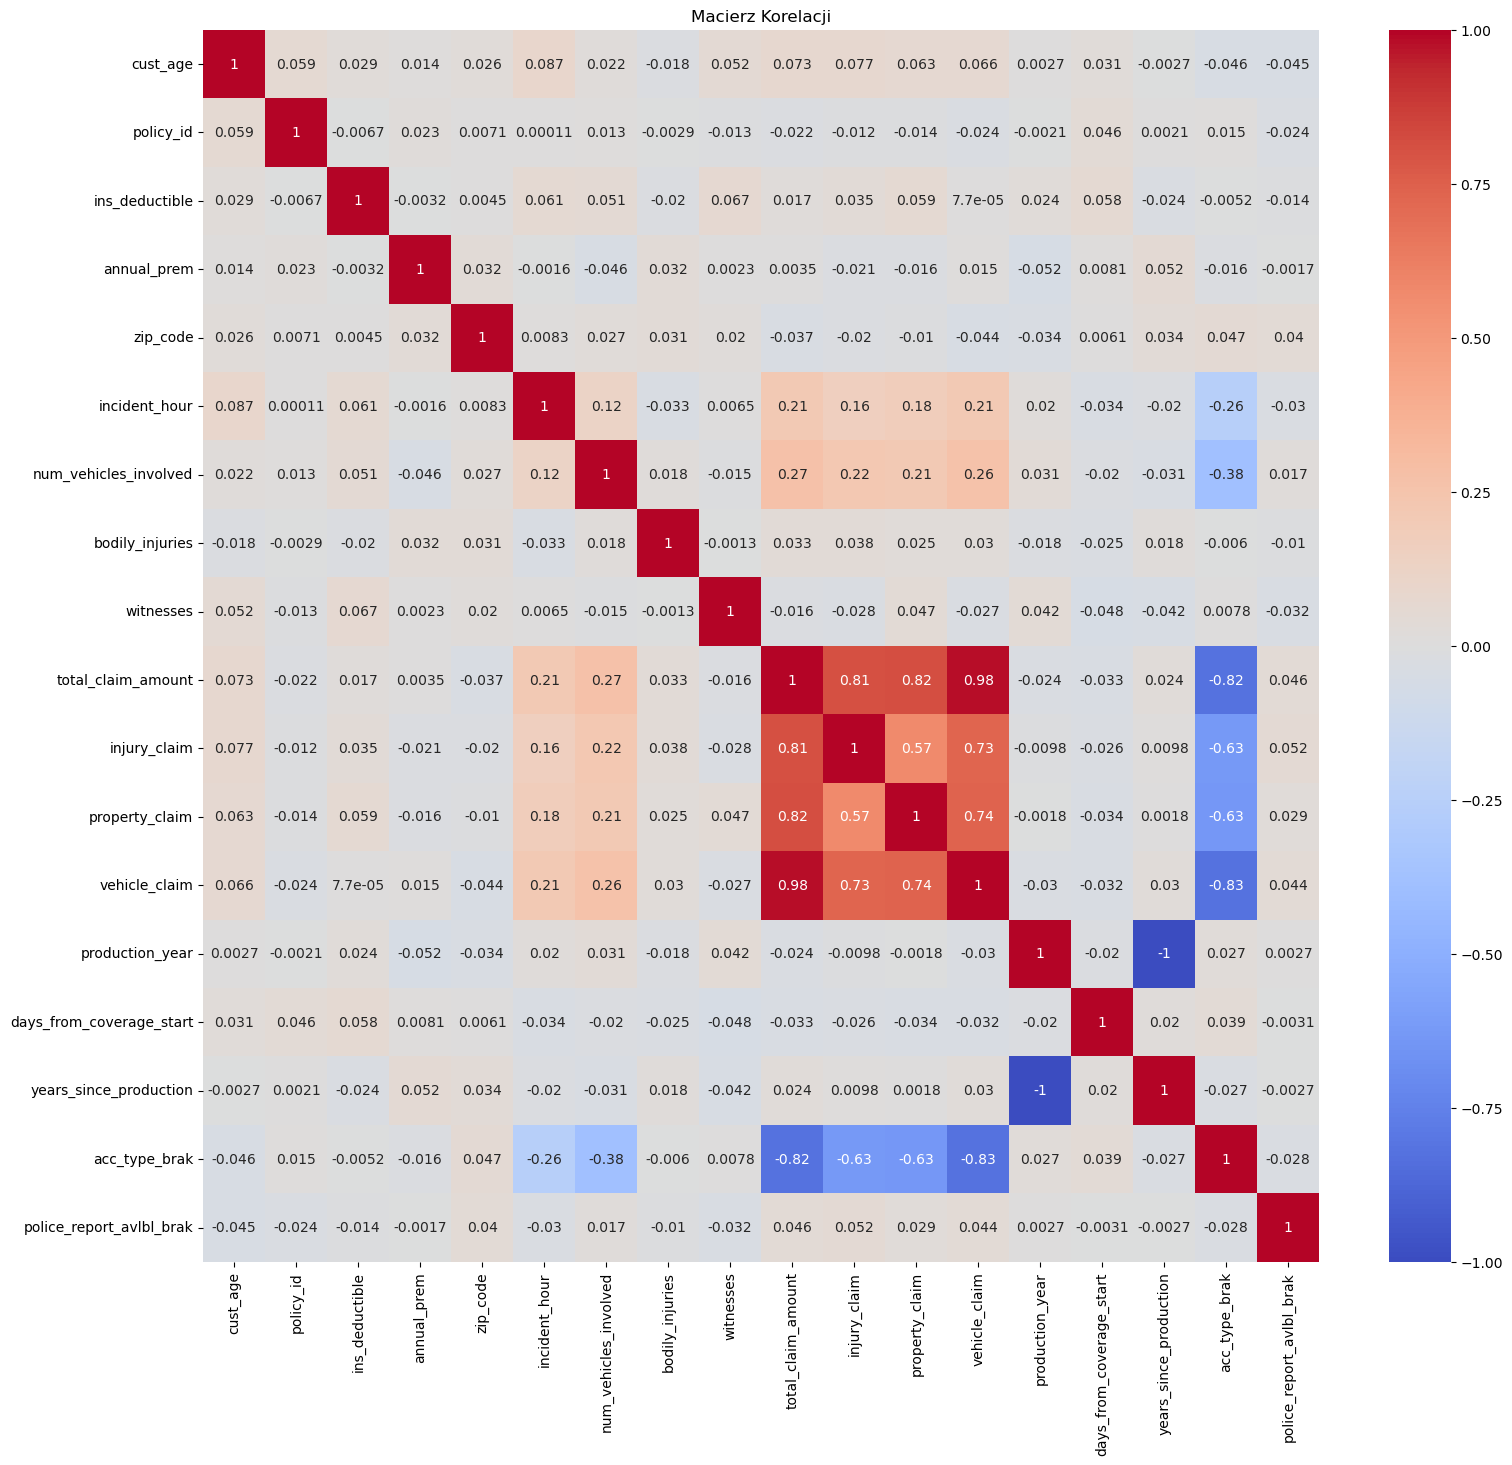

In [13]:
# Stworzenie macierzy korelacji zmiennych
macierz_korelacji = data.corr()

plt.figure(figsize=(18, 16))
sns.heatmap(macierz_korelacji, cmap='coolwarm', annot=True)
plt.title('Macierz Korelacji')
plt.show()

In [14]:
data.drop('production_year', axis=1, inplace=True)

In [15]:
print(data.columns)

Index(['cust_age', 'policy_id', 'coverage_start_date', 'cust_region',
       'sum_assured_group', 'ins_deductible', 'annual_prem', 'zip_code',
       'insured_sex', 'edu_lvl', 'marital_status', 'claim_incurred_date',
       'claim_type', 'acc_type', 'emg_services_notified', 'incident_city',
       'incident_hour', 'num_vehicles_involved', 'property_damage',
       'bodily_injuries', 'witnesses', 'police_report_avlbl',
       'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim',
       'car_brand', 'car_model', 'days_from_coverage_start',
       'years_since_production', 'acc_type_brak', 'police_report_avlbl_brak'],
      dtype='object')


In [16]:
# for kolumna in data.columns:
#     plt.figure(figsize=(12, 6))
#     sns.countplot(x=kolumna, hue='acc_type_brak', data=data)
#     plt.title(f'Rozkład braków danych w kolumnach informujących o brakach dla różnych wartości {kolumna}')
#     plt.show()

In [17]:

# Defining NA_acc_type as a subset of data where a certain column is NaN
# Replace 'your_column_name' with the actual column name you are interested in

NA_acc_type = data[data['num_vehicles_involved'].isna()]


In [18]:
print(NA_acc_type['num_vehicles_involved'].value_counts())
print(data['num_vehicles_involved'].value_counts(dropna=False))
print(NA_acc_type['claim_type'].value_counts())
print(data['claim_type'].value_counts(dropna=False))

Series([], Name: num_vehicles_involved, dtype: int64)
1    581
3    358
4     31
2     30
Name: num_vehicles_involved, dtype: int64
Series([], Name: claim_type, dtype: int64)
multi-vehicle collision     419
single vehicle collision    403
theft                        94
parked car                   84
Name: claim_type, dtype: int64


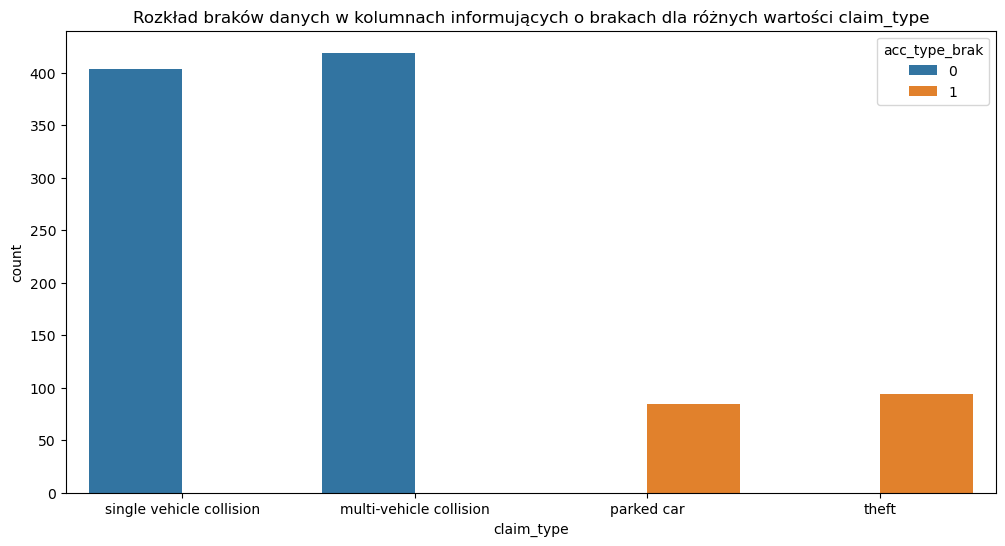

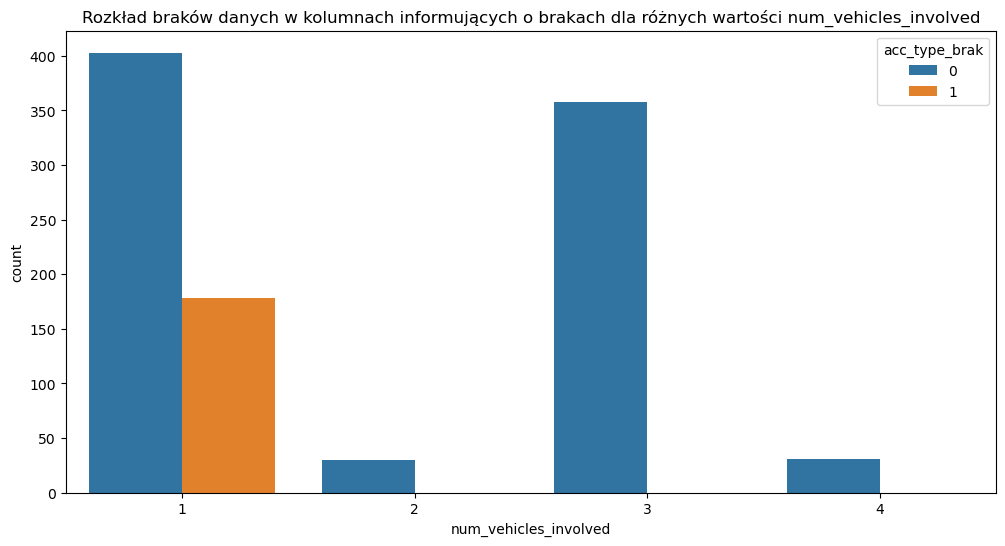

In [19]:
for kolumna in ['claim_type','num_vehicles_involved']:
    plt.figure(figsize=(12, 6))
    sns.countplot(x=kolumna, hue='acc_type_brak', data=data)
    plt.title(f'Rozkład braków danych w kolumnach informujących o brakach dla różnych wartości {kolumna}')
    plt.show()

In [20]:
# Braki dla kolumny acc_type występują tylko w przypadkach,
# gdzie tylko jeden pojazd uczestniczył w zdarzeniu oraz gdy zdarzenie dotyczyło kradzieży/zaparkowanego auta.
# Uzupełniamy braki w kolumnie tworząc nową kategorię zmiennej acc_type
data['acc_type'] = data['acc_type'].fillna('one vehicle involved')

In [21]:
# for kolumna in data.columns:
#     plt.figure(figsize=(12, 6))
#     sns.countplot(x=kolumna, hue='police_report_avlbl_brak', data=data)
#     plt.title(f'Rozkład braków danych w kolumnach informujących o brakach dla różnych wartości {kolumna}')
#     plt.show()

In [22]:
# Uzupełnienie braków zmiennej police_report_avlbl
data['police_report_avlbl'] = data['police_report_avlbl'].fillna('NO INFORMATION')

In [23]:
# Importing necessary libraries
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [24]:
# Assuming 'data' is your DataFrame containing the variables for segmentation
# Replace 'data' with the actual name of your DataFrame
# data = pd.read_csv('your_data.csv') # Uncomment this if you need to load the data

In [25]:
# Normalizing data: Handling TypeError by excluding non-numeric columns
from sklearn.preprocessing import StandardScaler
import numpy as np


In [26]:
# Select only numerical columns for normalization
numerical_data = data.select_dtypes(include=[np.number])

In [27]:

# Initialize the StandardScaler
scaler = StandardScaler()

In [29]:
# Perform the fit_transform operation on numerical data only
data_normalized = scaler.fit_transform(numerical_data)

# Optional: If you want to recombine the normalized data with the non-numerical data, uncomment the following line:
# data[numerical_data.columns] = pd.DataFrame(data_normalized, columns=numerical_data.columns)

In [31]:
# Finding the optimal number of clusters using the Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data_normalized)
    wcss.append(kmeans.inertia_)

C:\Users\kondr\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


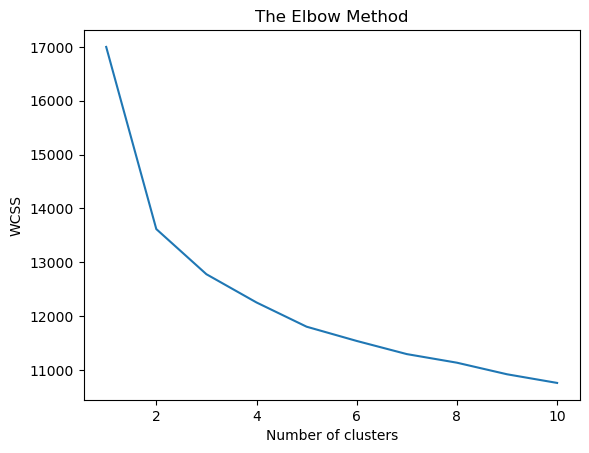

In [33]:
# Plotting the results onto a line graph to observe 'The Elbow'
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

In [34]:
# Choose the optimal number of clusters and fit the KMeans model
# Replace 'optimal_k' with the chosen number of clusters
optimal_k = 3 # Example value
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(data_normalized)

In [36]:
# Adding cluster labels to the original data
data['Cluster'] = y_kmeans

In [37]:
# Select only numerical columns for normalization
numerical_data = data.select_dtypes(include=[np.number])

In [38]:
# Initialize the StandardScaler
scaler = StandardScaler()